In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Iris_flower.csv')

In [3]:
dataset.head(4)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


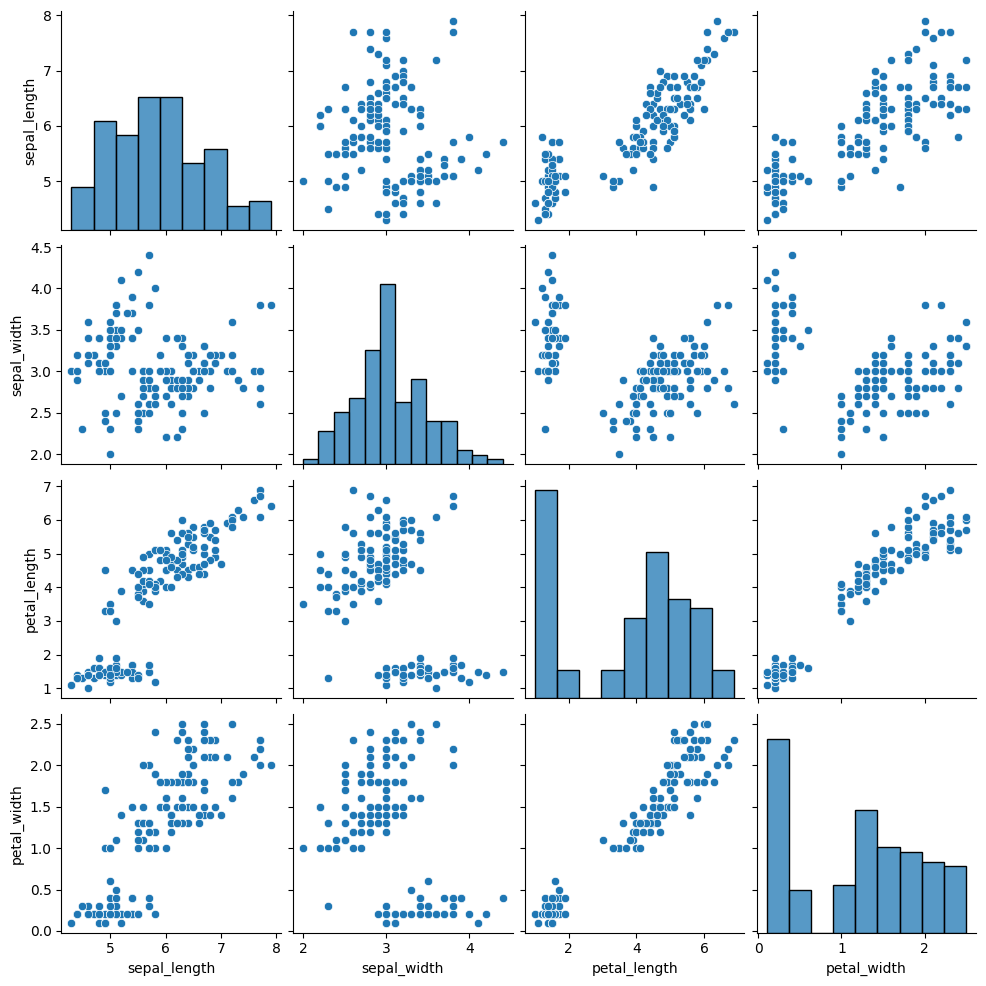

In [4]:
sns.pairplot(data=dataset)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []
for i in range (2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(dataset)
    wcss.append(km.inertia_)

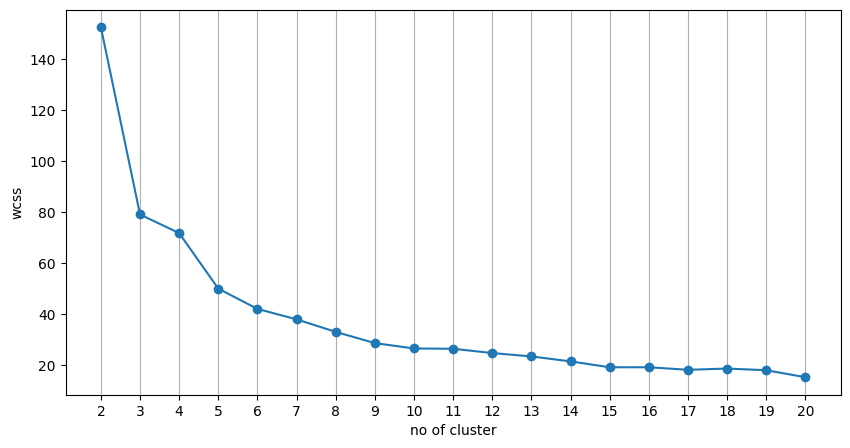

In [7]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss,marker="o")
plt.xlabel("no of cluster")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis="x")
plt.show()

In [8]:
kmn = KMeans(n_clusters=3)
dataset["predict"]=kmn.fit_predict(dataset)

In [9]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


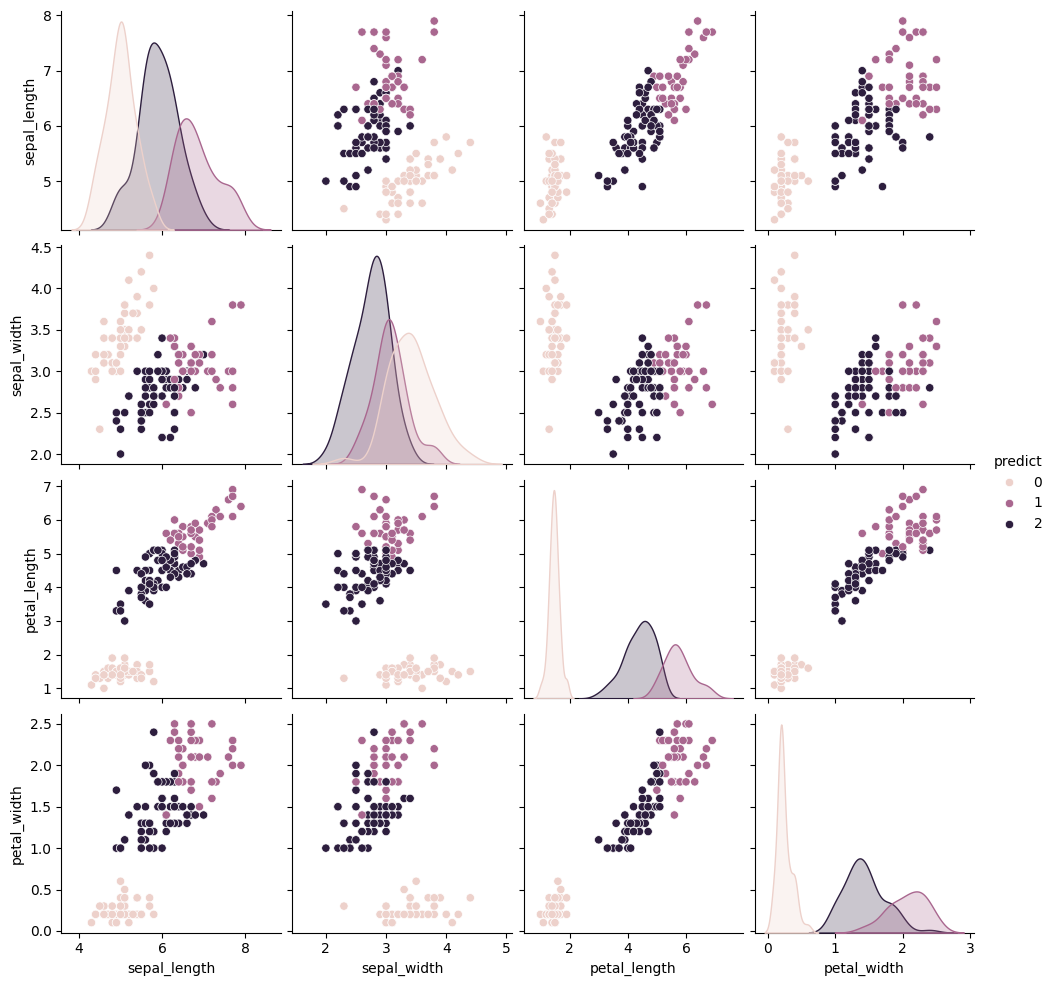

In [10]:
sns.pairplot(data=dataset,hue="predict")
plt.show()

In [11]:
org_dataset= pd.read_csv("IRIS.csv")
org_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


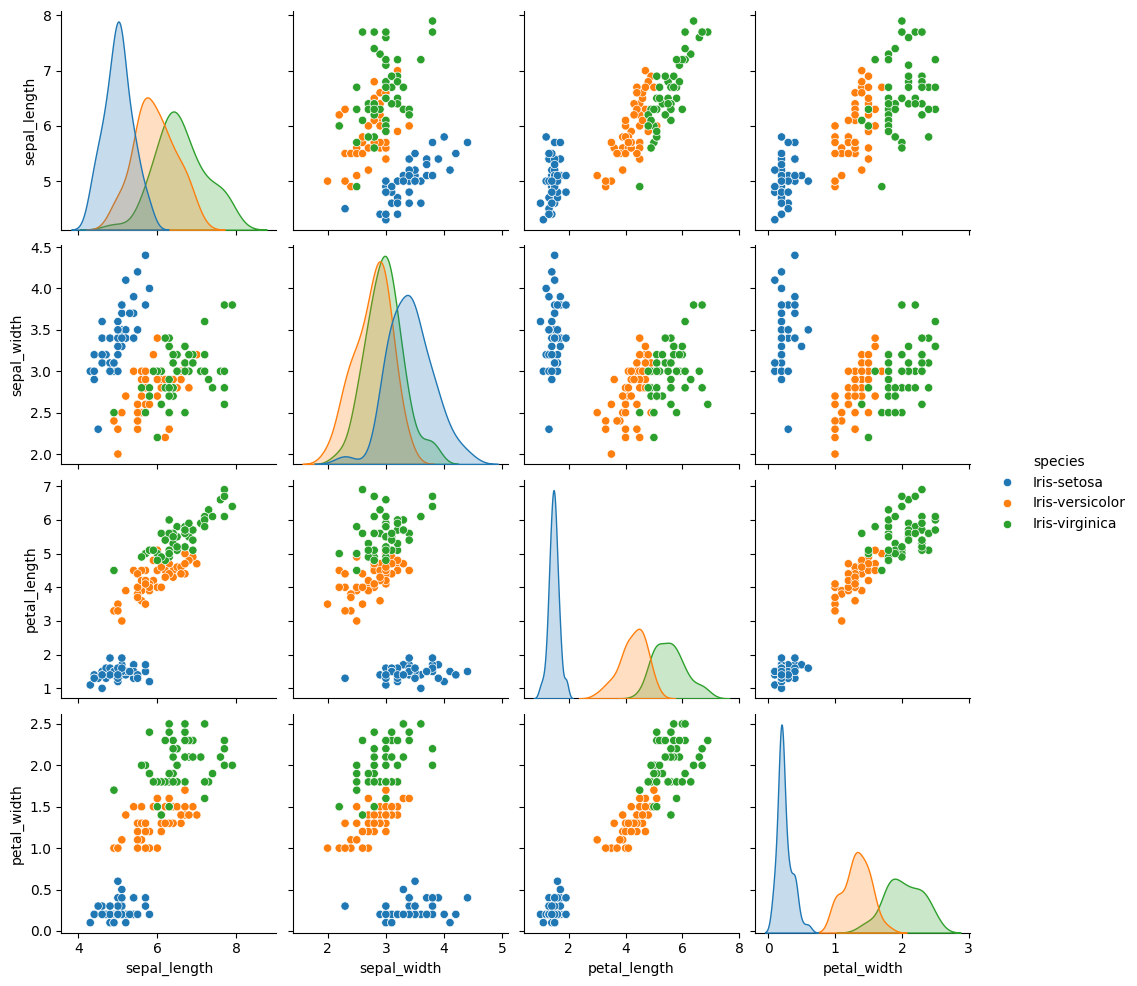

In [12]:
sns.pairplot(data=org_dataset,hue="species")
plt.show() 

In [13]:
from sklearn.metrics import silhouette_score

In [15]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [17]:
silhouette_score(dataset,labels=kmn.labels_)

np.float64(0.622949001413142)

In [20]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1=KMeans(n_clusters=i)
    km1.fit(dataset)
    ss.append(silhouette_score(dataset,km1.labels_))

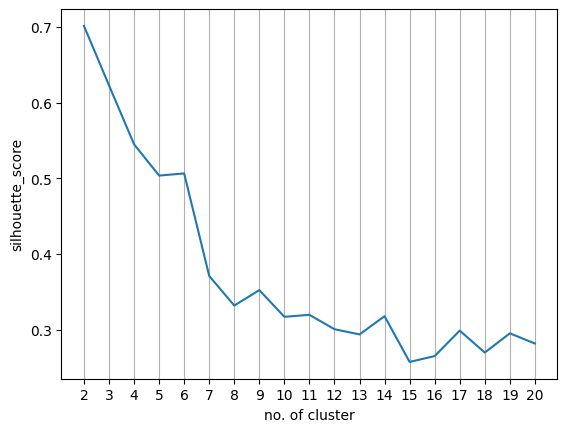

In [24]:
plt.plot(no_c,ss)
plt.xlabel("no. of cluster")
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()